In [1]:
import numpy as np
import ospgrillage as og
%matplotlib inline

In [2]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa


# parameters of bridge grillage
L = 84 * m  # span
w = 13 * m  # width
n_l = 7  # number of longitudinal members
n_t = 14  # number of transverse members
edge_dist = 0.9 * m  # distance between edge beam and first exterior beam
angle = 0  # skew angle
offset_beam_y = 0.96 * m
mesh_type = "Oblique"
max_mesh_size_z = 1 * m
max_mesh_size_x = 1 * m
link_nodes_width = 0.89 * m
# transverse_spacing = [6.09,6.09,6.83,6.89,6.9,5.9,6.9,6.92,6.8,6.09,6.09,6.09]
multi_span = [25.22* m, 33.56 *m , 25.22*m ]
nl_multi = [6,15,6]
stich_slab_x_spacing = 0.5 * m

In [3]:
# spans = [5* m, 14* m, 5* m]
# nl_multi = [6,20,6]
# stich_slab_x_spacing = 0.5 * m

In [4]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")
Steel = og.create_material(material ="steel", E = 210 * GPa, G = 79.3 * GPa, grade ="R250N")
# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)


longitudinal_section = og.create_section(
    A = 0.04013096812499986 * m2,
    J = 0.0036462535514488223 * m3,
    Iz = 0.016361693408177985 * m4,
    Iy = 0.00014597129903936982 * m4
    
)

transverse_section = og.create_section(
    A = 0.171 * m2,
    J = 1.7839218367999745 * m3,
    Iy = 0.011542500000000053 * m4,
    Iz = 0.0005144249999999916 * m4
)

end_transverse_section = og.create_section(
    A = 0.08550000000000006 * m2,
    J = 0.7553912338502597 * m3,
    Iy = 0.0014428125000000046 * m4,
    Iz = 0.0002572125000000013 * m4
)
# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=Steel)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
# transverse_slab = og.create_member(section=transverse_section, material=concrete)
# end_transverse_slab = og.create_member(
#     section=end_transverse_section, material=concrete
# )

#slab shell element 
# create material of slab shell
slab_shell_mat = og.create_material(
    material="concrete", code="AS5100-2017", grade="50MPa", rho=2400
)

# create section of slab shell
slab_shell_section = og.create_section(h=0.18)
# shell elements for slab
slab_shell = og.create_member(section=slab_shell_section, material=slab_shell_mat)

In [5]:
variant_one_model = og.create_grillage(
    bridge_name="Test",
    long_dim=L,
    width=w,
    skew=angle,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    edge_beam_dist=edge_dist,
    model_type="shell_beam",
    mesh_type=mesh_type,
    max_mesh_size_z=max_mesh_size_z,
    max_mesh_size_x=max_mesh_size_x,
    offset_beam_y_dist=offset_beam_y,
    link_nodes_width=link_nodes_width,
    beam_width = 0.445 ,
    multi_span_dist_list= multi_span,
    multi_span_num_points=nl_multi,
    continuous = True,

)

# assign grillage member to element groups of grillage model
variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_one_model.set_shell_members(slab_shell)

No Model_ODB specified, trying to get data from the active model.
3D model


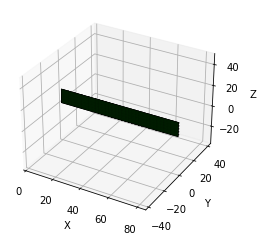

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [6]:
variant_one_model.create_osp_model(pyfile=False)
og.opsplt.plot_model()  # plotting using Get_rendering
#og.opsv.plot_model(az_el=(-90, 0))  # plotting using ops_vis
#og.plt.show()


In [7]:

# variant_one_model = og.create_grillage(
#         bridge_name=bridge_name,
#         long_dim=L,
#         width=w,
#         skew=angle,
#         num_long_grid=n_l,
#         num_trans_grid=n_t,
#         edge_beam_dist=edge_dist,
#         model_type="shell_beam",
#         max_mesh_size_z=max_mesh_size_z,
#         max_mesh_size_x=max_mesh_size_x,
#         offset_beam_y_dist=offset_beam_y,
#         link_nodes_width=link_nodes_width,
#         beam_width = 0.445 ,
# #         multi_span_dist_list= multi_span,
# #         beam_x_spacing = transverse_spacing
#         mesh_type=mesh_type,
#         multi_span_dist_list=spans,
#         multi_span_num_points=nl_multi,
#         continuous=True,
#         #non_cont_spacing_x=stich_slab_x_spacing,
#     )

# # assign grillage member to element groups of grillage model
# variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
# variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
# variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
# # variant_one_model.set_member(transverse_slab, member="transverse_slab")
# # variant_one_model.set_member(end_transverse_slab, member="start_edge")
# # variant_one_model.set_member(end_transverse_slab, member="end_edge")
# variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")

In [8]:
# Compound point loads along midspan width (P is kN)
# working in global coordinate system
P = 100 * kN

p_list = [
    0,
    0+ 2.25 *m,
    0+ 2.25 *m + 2.25 *m,
    0+ 2.25 *m + 2.25 *m +2.25*m,
    w,
]  # creating list of load position

test_points_load = og.create_compound_load(name="Test 100kn")

# create point load in global coordinate
for p in p_list:
    point = og.create_load(
       loadtype = "point", name ="Point7", point1=og.create_load_vertex(x= L/2 * m, z=p, p=P)
    )
    test_points_load.add_load(load_obj=point)
    

# Create load case, add loads, and assign
points_case = og.create_load_case(name="Test")
points_case.add_load(test_points_load)

variant_one_model.add_load_case(points_case)

In [9]:
variant_one_model.analyze()
results = variant_one_model.get_results()
force_array = results.forces_beam
moment = force_array.sel(Component='Mz_i')

#print(moment)

In [22]:
moment 

<xarray.DataArray 'forces_beam' (Loadcase: 1, Element: 624)>
array([[ 3.90607286e+02, -6.78804685e+02,  1.65219786e+05,
         2.55729645e+05,  4.22851624e+05,  4.73261979e+05,
         6.83936624e+05,  6.63396483e+05,  9.47453239e+05,
         8.54091355e+05,  1.22011750e+06,  1.04049162e+06,
         1.33949539e+06,  1.11956965e+06,  1.46026164e+06,
         1.19658594e+06,  1.58271591e+06,  1.27200996e+06,
         1.70409484e+06,  1.34527187e+06,  1.82084619e+06,
         1.41797953e+06,  1.92715274e+06,  1.49709538e+06,
         2.03247682e+06,  1.59783176e+06,  1.93126759e+06,
         1.49289781e+06,  1.82913455e+06,  1.40950331e+06,
         1.71670751e+06,  1.33241432e+06,  1.59984060e+06,
         1.25461122e+06,  1.48209049e+06,  1.17448409e+06,
         1.36615761e+06,  1.09267460e+06,  1.25185330e+06,
         1.00857348e+06,  9.93542902e+05,  8.08566604e+05,
         7.46899063e+05,  6.02484027e+05,  5.10121023e+05,
         3.91305372e+05,  2.57228570e+05,  1.71277310e+05,
        -1.93603760e+05, -2.73736976e+04,  5.08566019e+04,
         1.18809864e+05,  1.87586608e+05,  2.79987682e+05,
         3.15792138e+05,  3.51167467e+05,  3.85032837e+05,
         4.17919586e+05,  4.48561676e+05,  4.88015543e+05,
...
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan]])
Coordinates:
    Component  <U7 'Mz_i'
  * Loadcase   (Loadcase) <U4 'Test'
  * Element    (Element) int64 39 58 78 97 117 136 ... 1527 1528 1529 1530 1531

In [25]:
force_array.sel(Loadcase="Test", Element=[956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979])

<xarray.DataArray 'forces_beam' (Element: 24, Component: 30)>
array([[-1.44194163e+04,  1.44194163e+04,             nan,
                    nan,  1.95075213e+03,  1.96223845e+03,
                    nan,             nan, -1.93603760e+05,
        -1.59631136e+05,             nan,             nan,
         8.84613529e+04, -8.84613529e+04,             nan,
                    nan, -7.00307090e+04,  7.00307090e+04,
                    nan,             nan, -7.75771330e+02,
         7.75771330e+02,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
       [-6.28841247e+03,  6.28841247e+03,             nan,
                    nan,  9.76967094e+02,  1.00003655e+03,
                    nan,             nan, -2.73736976e+04,
        -1.79098734e+05,             nan,             nan,
        -1.06760588e+05,  1.06760588e+05,             nan,
                    nan, -4.09342648e+04,  4.09342648e+04,
                    nan,             nan, -3.91951556e+02,
         3.91951556e+02,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
...
       [ 8.73736545e+03, -8.73736545e+03,             nan,
                    nan, -1.33105184e+03, -1.32494714e+03,
                    nan,             nan,  1.82515269e+05,
        -1.79170712e+04,             nan,             nan,
        -1.86160921e+05,  1.86160921e+05,             nan,
                    nan,  3.26324739e+04, -3.26324739e+04,
                    nan,             nan,  5.26566016e+02,
        -5.26566016e+02,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
       [ 1.65899463e+04, -1.65899463e+04,             nan,
                    nan, -2.22177323e+03, -2.14676852e+03,
                    nan,             nan,  1.32234350e+05,
         6.24046504e+04,             nan,             nan,
        -6.66002926e+04,  6.66002926e+04,             nan,
                    nan,  3.85882236e+04, -3.85882236e+04,
                    nan,             nan,  8.66086786e+02,
        -8.66086786e+02,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan]])
Coordinates:
  * Component  (Component) <U7 'Mx_i' 'Mx_j' 'Mx_k' ... 'theta_y' 'theta_z'
    Loadcase   <U4 'Test'
  * Element    (Element) int64 956 957 958 959 960 961 ... 975 976 977 978 979

In [11]:
exterior_1 = variant_one_model.get_element(member="exterior_main_beam_1", options="elements")
exterior_2 = variant_one_model.get_element(member="exterior_main_beam_2", options="elements")
interior = variant_one_model.get_element(member="interior_main_beam", options="elements")
edge_1 = variant_one_model.get_element(member="edge_beam", options="elements", z_group_num=0)
edge_2 = variant_one_model.get_element(member="edge_beam", options="elements", z_group_num=1)

extracted_bending_exterior_1 = results.forces_beam.sel(Loadcase=['Test'], Element= exterior_1 , Component="Mz_i")
extracted_bending_exterior_2 = results.forces_beam.sel(Loadcase=['Test'], Element= exterior_2 , Component="Mz_i")
extracted_bending_interior = results.forces_beam.sel(Loadcase=['Test'], Element= interior , Component="Mz_i")
extracted_bending_edge1 = results.forces_beam.sel(Loadcase=['Test'], Element= edge_1 , Component="Mz_i")
extracted_bending_edge2 = results.forces_beam.sel(Loadcase=['Test'], Element= edge_2 , Component="Mz_i")

In [24]:
exterior_1

[956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979]

In [23]:
extracted_bending_exterior_1

<xarray.DataArray 'forces_beam' (Loadcase: 1, Element: 24)>
array([[-193603.76021806,  -27373.69756083,   50856.60185103,
         118809.86408949,  187586.60831647,  279987.68164115,
         315792.13803146,  351167.46658432,  385032.83683397,
         417919.58585643,  448561.67641258,  488015.54321349,
         567243.72608436,  540856.24345746,  506732.19485311,
         476374.14406192,  445876.56941507,  415022.87502459,
         382498.26426697,  374128.13679087,  313147.57333815,
         250901.55566947,  182515.26944871,  132234.34957671]])
Coordinates:
    Component  <U7 'Mz_i'
  * Loadcase   (Loadcase) <U4 'Test'
  * Element    (Element) int64 956 957 958 959 960 961 ... 975 976 977 978 979

C:\Users\Sokunthervy vann\anaconda3\envs\OSP\lib\site-packages\ospgrillage\postprocessing.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


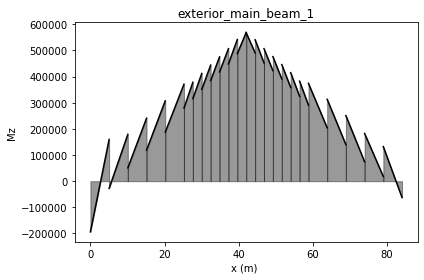

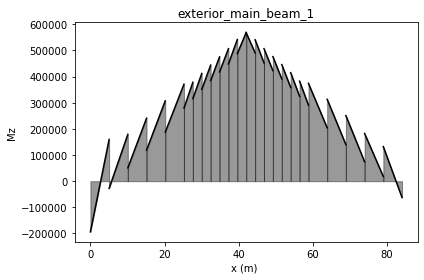

In [19]:
og.plot_force(variant_one_model, results, member="exterior_main_beam_1", component="Mz")

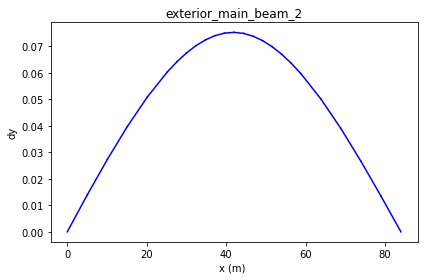

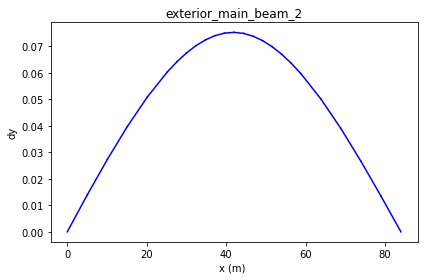

In [14]:
og.plot_defo(variant_one_model, results, member="exterior_main_beam_2", option= "nodes")

In [15]:
# ele_set_4m = [161,714, 690,666,148]
# ele_set_7m = [215,716,692,669,229]
# ele_set_17m = [485,726,702,678,472]
# ele_set_20m = [593,730,706,682,580]

# extracted_bending_17m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_17m , Component="Mz_i")
# extracted_bending_7m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_7m , Component="Mz_i")
# extracted_bending_4m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_4m , Component="Mz_i")
# extracted_bending_20m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_20m , Component="Mz_i")

In [16]:
moment 


<xarray.DataArray 'forces_beam' (Loadcase: 1, Element: 624)>
array([[ 3.90607286e+02, -6.78804685e+02,  1.65219786e+05,
         2.55729645e+05,  4.22851624e+05,  4.73261979e+05,
         6.83936624e+05,  6.63396483e+05,  9.47453239e+05,
         8.54091355e+05,  1.22011750e+06,  1.04049162e+06,
         1.33949539e+06,  1.11956965e+06,  1.46026164e+06,
         1.19658594e+06,  1.58271591e+06,  1.27200996e+06,
         1.70409484e+06,  1.34527187e+06,  1.82084619e+06,
         1.41797953e+06,  1.92715274e+06,  1.49709538e+06,
         2.03247682e+06,  1.59783176e+06,  1.93126759e+06,
         1.49289781e+06,  1.82913455e+06,  1.40950331e+06,
         1.71670751e+06,  1.33241432e+06,  1.59984060e+06,
         1.25461122e+06,  1.48209049e+06,  1.17448409e+06,
         1.36615761e+06,  1.09267460e+06,  1.25185330e+06,
         1.00857348e+06,  9.93542902e+05,  8.08566604e+05,
         7.46899063e+05,  6.02484027e+05,  5.10121023e+05,
         3.91305372e+05,  2.57228570e+05,  1.71277310e+05,
        -1.93603760e+05, -2.73736976e+04,  5.08566019e+04,
         1.18809864e+05,  1.87586608e+05,  2.79987682e+05,
         3.15792138e+05,  3.51167467e+05,  3.85032837e+05,
         4.17919586e+05,  4.48561676e+05,  4.88015543e+05,
...
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan]])
Coordinates:
    Component  <U7 'Mz_i'
  * Loadcase   (Loadcase) <U4 'Test'
  * Element    (Element) int64 39 58 78 97 117 136 ... 1527 1528 1529 1530 1531

In [17]:
# p_list = [
#     0,
#     edge_dist,
#     edge_dist + 2.4 * m,
#     #edge_dist + 4.8 * m,
#     #edge_dist + 6 * m,
#     w - edge_dist,
#     w,
# ]  # creating list of load position


    # point_2 = og.create_load(
    #    loadtype = "point", name ="Point17", point1=og.create_load_vertex(x= 17 * m, z=p, p=P)
    # )
     

    # add to compound load
    # test_points_load.add_load(load_obj=point_2)